**Library Imports**

In [13]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install dython
from dython.nominal import associations

import warnings
warnings.filterwarnings("ignore") # Hide all warning messages, dropped in after completing EDA.

**Introduction.**

The data set to be used is the winter fashion Trends. With this Notebook, I will clean & process the data for EDA and identify potential patterns to support ML. The target (prediction variable) on which correlation is going to be tested is the Trending status.

# Importing data

Importing and simple exploration and aggreagation of importated data.

In [3]:
# Data import
df = pd.read_csv('/kaggle/input/winter-fashoin-trends/Winter_Fashion_Trends_Dataset.csv')
print(df.shape)
print(df.describe())

print(df.dtypes)

(150, 12)
               ID  Price(USD)  Popularity_Score  Customer_Rating
count  150.000000  150.000000        150.000000       150.000000
mean    75.500000  443.105933          5.763333         3.802667
std     43.445368  211.630074          2.655763         0.719428
min      1.000000   30.070000          1.100000         2.500000
25%     38.250000  292.807500          3.400000         3.125000
50%     75.500000  445.820000          5.850000         3.800000
75%    112.750000  631.537500          8.225000         4.400000
max    150.000000  788.030000         10.000000         5.000000
ID                    int64
Brand                object
Category             object
Color                object
Material             object
Style                object
Gender               object
Season               object
Price(USD)          float64
Popularity_Score    float64
Customer_Rating     float64
Trend_Status         object
dtype: object


***Findings 1:***
The data set contains 150 entries and 12 variables, 4 of which are numerical and the rest categorical (of the 4, one is ID, which I will remove in favour of the index).

Aggregating the numerical variables shows relatively clean distribution of the variable datas around their means meaning no outliers to deal with.

**Data cleaning and prep**

For this dataset, the only preparation going to be done is dropping the irrelevant data, missing values if any, and separation for analysis.

In [4]:
# Dropping the ID column which is irrelevant as we have an index.
df = df[[#'ID', 
    'Brand', 'Category', 'Color', 'Material', 'Style', 'Gender', 
         'Season', 'Price(USD)', 'Popularity_Score', 'Customer_Rating',
         'Trend_Status']].copy()

df.columns

Index(['Brand', 'Category', 'Color', 'Material', 'Style', 'Gender', 'Season',
       'Price(USD)', 'Popularity_Score', 'Customer_Rating', 'Trend_Status'],
      dtype='object')

In [5]:
# Checking for missing values
df.isnull().sum()

Brand               0
Category            0
Color               0
Material            0
Style               0
Gender              0
Season              0
Price(USD)          0
Popularity_Score    0
Customer_Rating     0
Trend_Status        0
dtype: int64

In [6]:
#checking for duplicated values
df.loc[df.duplicated()]

,Brand,Category,Color,Material,Style,Gender,Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status


In [7]:
#Checking for duplicates with a combination of categotical variable
df[['Brand', 'Category', 'Color', 'Material', 'Style', 'Gender', 
         'Season']].loc[df[['Brand', 'Category', 'Color', 'Material', 'Style', 'Gender', 
         'Season']].duplicated()]

,Brand,Category,Color,Material,Style,Gender,Season


***Findings 2:***
All data is present, no need for handling missing data and similarly, all entries are unique and not duplicated.

In [8]:
df.head()

,Brand,Category,Color,Material,Style,Gender,Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status
0,Adidas,Gloves,Brown,Polyester,Streetwear,Women,Winter 2025,244.06,6.0,4.9,Trending
1,Gucci,Gloves,Red,Leather,Sporty,Men,Winter 2023,366.73,8.8,3.3,Trending
2,H&M,Coat,Brown,Fleece,Streetwear,Unisex,Winter 2025,741.55,4.8,3.5,Trending
3,North Face,Coat,Blue,Cashmere,Formal,Men,Winter 2024,116.09,7.5,3.1,Outdated
4,Mango,Thermal,Blue,Cashmere,Formal,Unisex,Winter 2025,193.16,7.8,4.3,Outdated


In [14]:
# Split into cateogical and numerical using dtypes.
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(exclude=[np.number])

# EDA

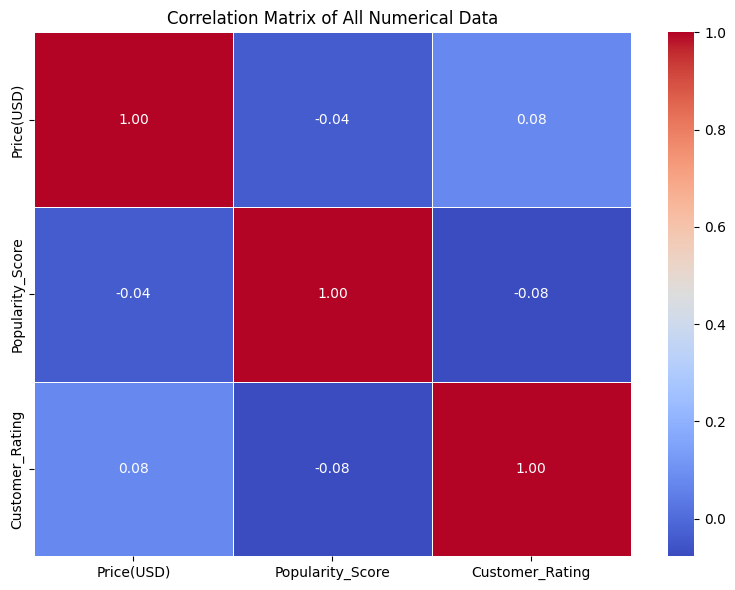

In [77]:
#Correlation matrix of numerical variables
cor_mtx_numerical = numerical_df.corr()

# Correlation heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(cor_mtx_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Numerical Data')

plt.tight_layout()
plt.show()

***Findings 3:***
There is a very low correlation between the numerical variables in the dataset; Popularity score, price and customer are independent of each other.

For further investigation, the realationship between all categorical and numerial variables is required.

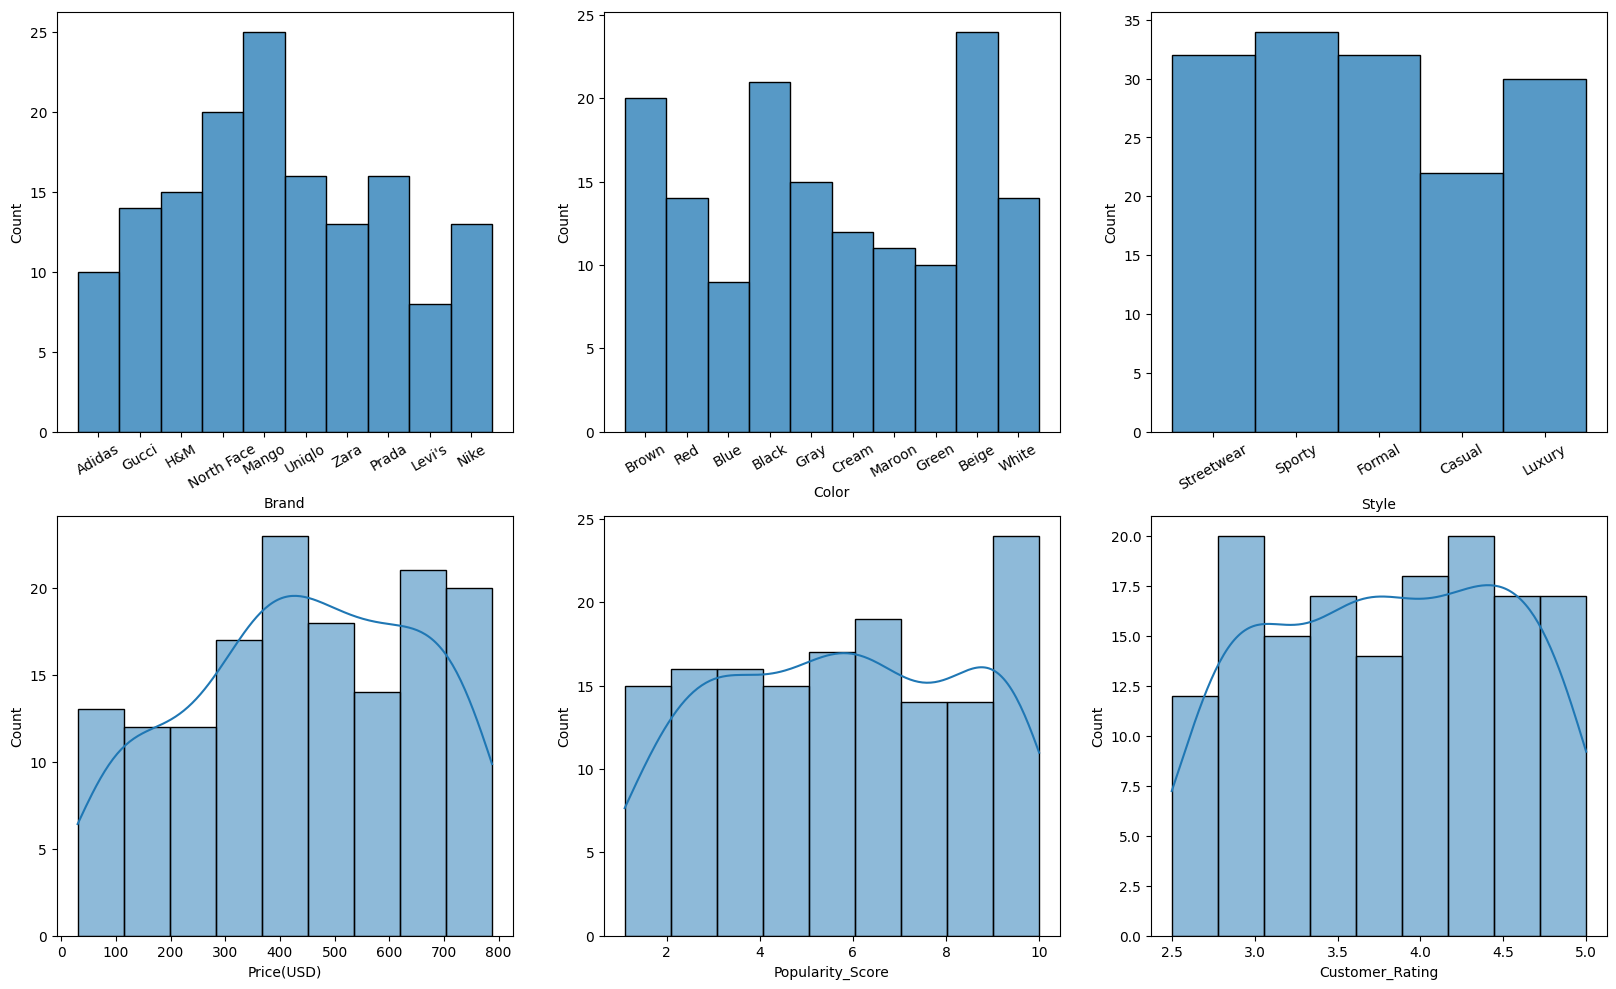

In [11]:
plt.figure(figsize = (20,12))

#Distribution of categorical data
plt.subplot(2,3,1)
sns.histplot(x= 'Brand', data = df)
plt.xticks(rotation=30)

plt.subplot(2,3,2)
sns.histplot(x= 'Color', data = df)
plt.xticks(rotation=30)

plt.subplot(2,3,3)
sns.histplot(x= 'Style', data = df)
plt.xticks(rotation=30)

# Distribution of price, popularity score and customer rating
plt.subplot(2,3,4)
sns.histplot(df['Price(USD)'], kde=True)

plt.subplot(2,3,5)
sns.histplot(df['Popularity_Score'], kde=True)

plt.subplot(2,3,6)
sns.histplot(df['Customer_Rating'], kde=True)

plt.tight_layout()
plt.show()

# Trend status explained by other variables.

***1. Trend status vs numerical variables***

In [17]:
price_meaned = df.groupby('Trend_Status')['Price(USD)'].mean()
ps_meaned = df.groupby('Trend_Status')['Popularity_Score'].mean()
cr_meaned = df.groupby('Trend_Status')['Customer_Rating'].mean()

print(price_meaned)
print(ps_meaned)
print(cr_meaned)

Trend_Status
Classic     383.267857
Emerging    449.759667
Outdated    442.018200
Trending    479.540238
Name: Price(USD), dtype: float64
Trend_Status
Classic     5.042857
Emerging    5.910000
Outdated    6.164000
Trending    5.661905
Name: Popularity_Score, dtype: float64
Trend_Status
Classic     3.689286
Emerging    3.676667
Outdated    3.836000
Trending    3.928571
Name: Customer_Rating, dtype: float64


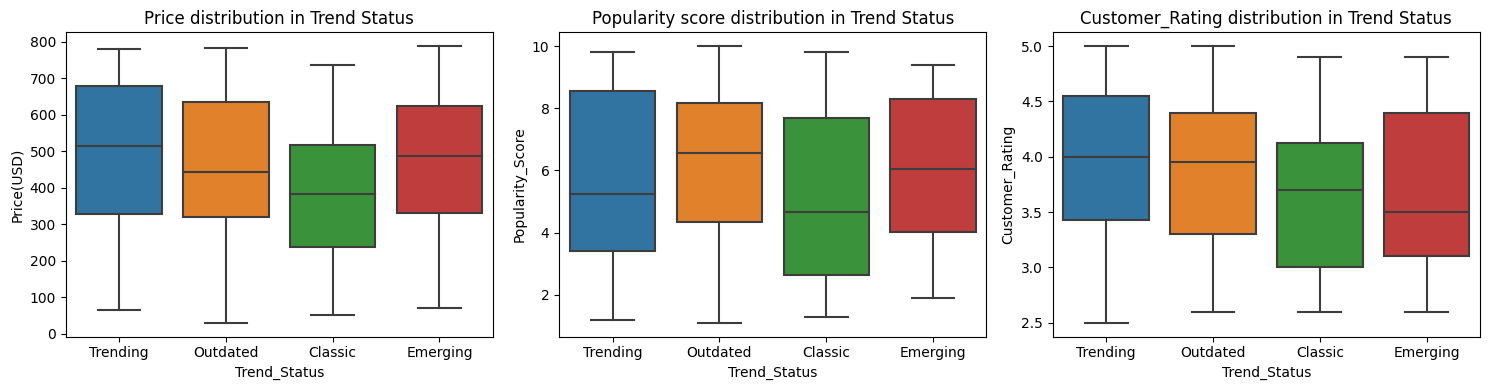

In [76]:
# Trend_Status against other numerical

plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.boxplot(x = "Trend_Status",y ="Price(USD)", data=df)
plt.title("Price distribution in Trend Status")

plt.subplot(1,3,2)
sns.boxplot(x = "Trend_Status",y ="Popularity_Score", data=df)
plt.title("Popularity score distribution in Trend Status")

plt.subplot(1,3,3)
sns.boxplot(x = "Trend_Status",y ="Customer_Rating", data=df)
plt.title("Customer_Rating distribution in Trend Status")

plt.tight_layout()
plt.show()

1. On average, Trending garmets tend to be more pricy, followed by those that are emerging; when clothes go out of fashion, their price continues to drip till they become classics.

2. Outdated garmets tend to have higher popularity score than emerging, trending and classical. This is probably because at the point they are going out of fashion, they have fully reached all corners of the populas and are know and identifiable by many, still fresh in their minds too.

3. Trending threads have a slightly higher rating that rating than the rest, but the spread is not significantly high. All garmets average out at a customer rating of approximately 4 with classics and emerging trends being rated least. This is probably because they have been forgotten or are yet to be discovered respectively.

***2. Trend status vs categorical variables***

In [74]:
#Pivoting categorical variables with Trend Status
crosstab1 = pd.crosstab(df.Trend_Status, df.Brand)
crosstab2 = pd.crosstab(df.Trend_Status, df.Color)
crosstab3 = pd.crosstab(df.Trend_Status, df.Style)

crosstab1
#print(crosstab2)
#print(crosstab3)

Brand,Adidas,Gucci,H&M,Levi's,Mango,Nike,North Face,Prada,Uniqlo,Zara
Trend_Status,,,,,,,,,,
Classic,1,3,0,3,7,2,5,2,4,1
Emerging,3,2,2,0,4,3,7,6,0,3
Outdated,2,6,4,3,11,4,6,4,6,4
Trending,4,3,9,2,3,4,2,4,6,5


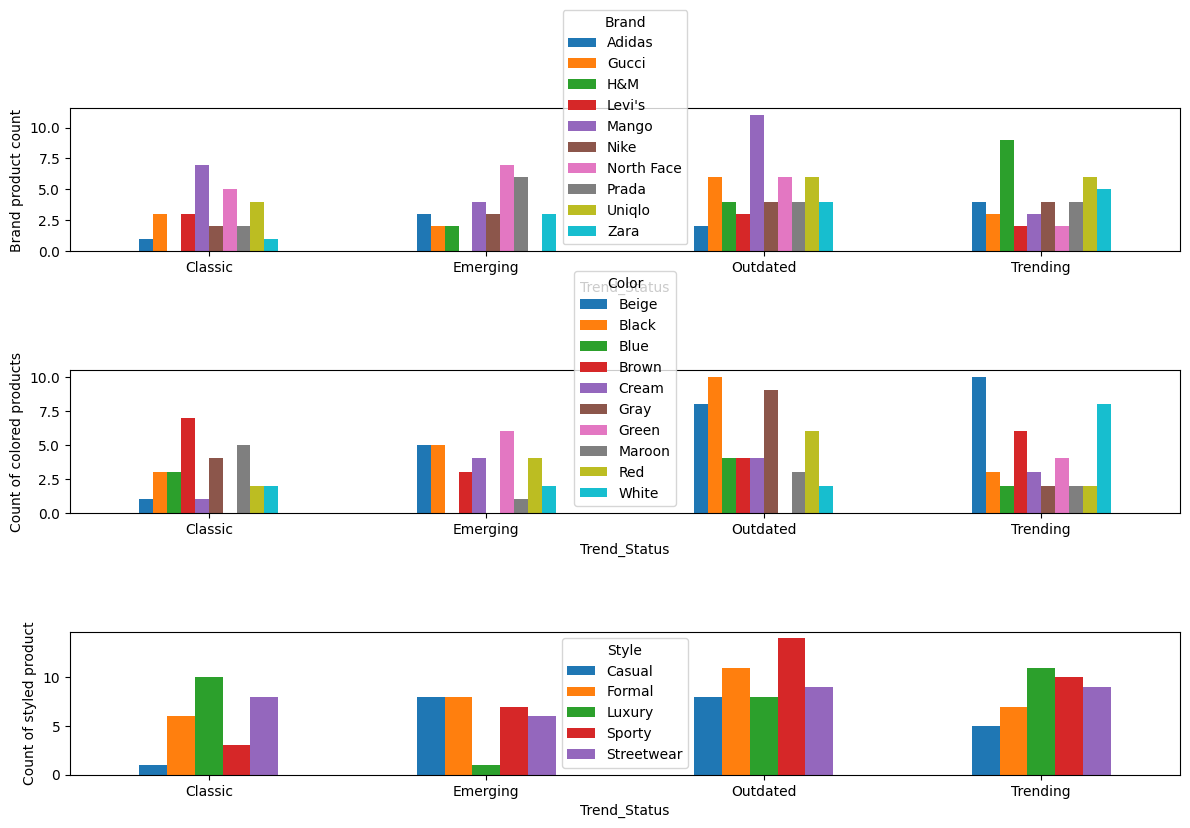

In [95]:
#Charting the cross tables
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
crosstab1.plot(kind='bar', stacked=False, rot=0, ax=plt.gca(), legend = True)
plt.ylabel("Brand product count")

plt.subplot(3,1,2)
crosstab2.plot(kind='bar', stacked=False, rot=0, ax=plt.gca(), legend = True)
plt.ylabel("Count of colored products")

plt.subplot(3,1,3)
crosstab3.plot(kind='bar', stacked=False, rot=0, ax=plt.gca(), legend = True)
plt.ylabel("Count of styled product")

plt.tight_layout()
plt.show()

crosstab1 = pd.crosstab(data.Attrition, data.Education) ***for pivots***

add plot above